<a href="https://colab.research.google.com/github/Cours-EDUlib/FAS-ISDS/blob/main/module-4/4_3_graphiques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
install.packages("questionr", dep = TRUE)
require(questionr)
data(hdv2003)
bd <- hdv2003

# 4 graphiques de base: hist(), boxplot(), plot(),  barplot()

### La fonction générique plot() - s'adapte au type d'objet fourni



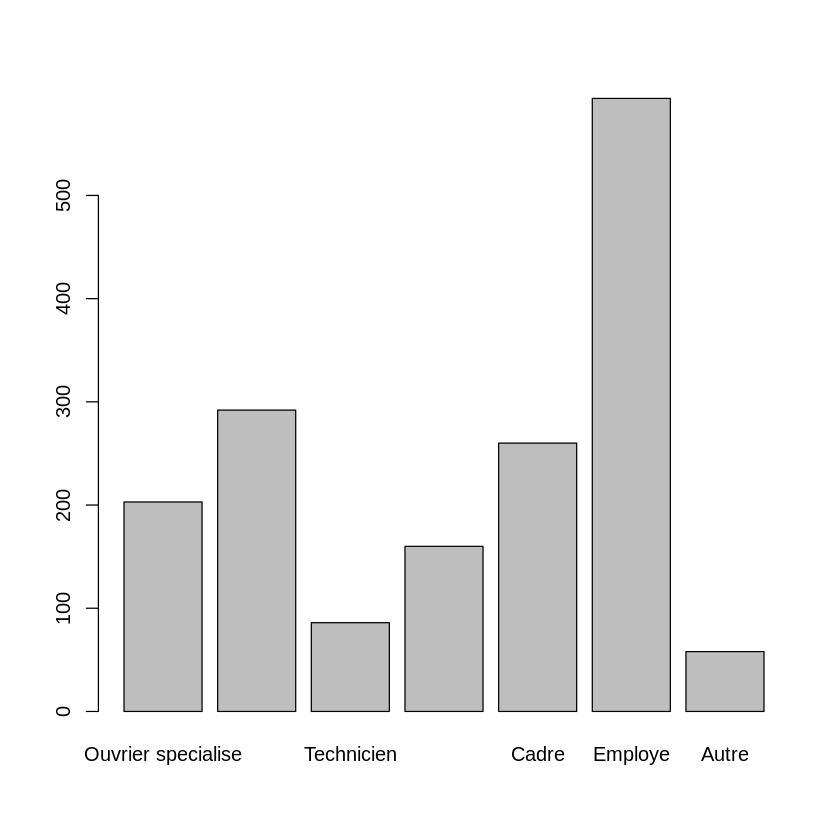

In [ ]:
plot(bd$qualif) # var quali = graphique à barres

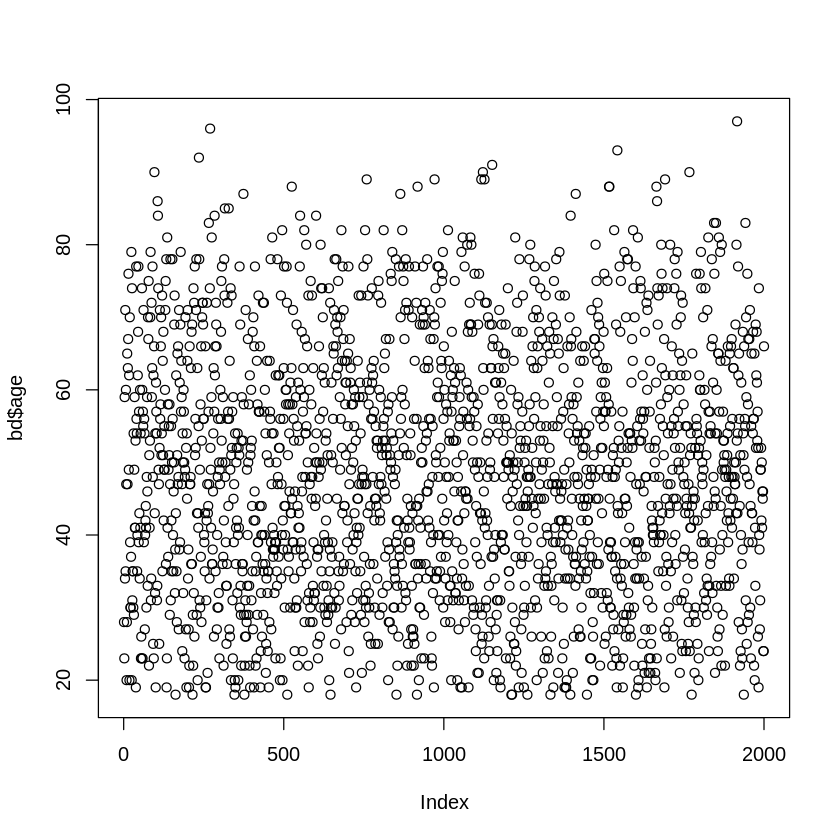

In [ ]:
plot(bd$age) # var quanti = nuage de points

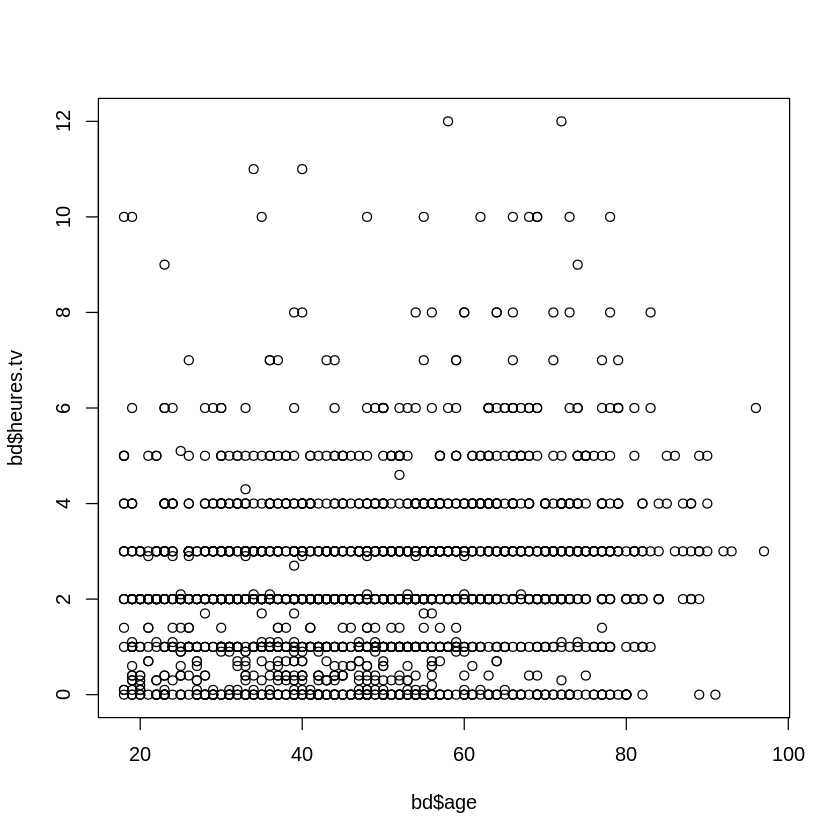

In [ ]:
plot(bd$age, bd$heures.tv)  # var quanti/quanti = nuage de points

In [ ]:
## Modifications possibles parmi tant d'autres: faire varier les points selon les valeurs d'un autre variable
plot(bd$age, bd$heures.tv)  # var quanti/quanti

points(bd$age[bd$sexe=="Homme"], bd$heures.tv[bd$sexe=="Homme"], pch=16, col="steelblue")
points(bd$age[bd$sexe=="Femme"], bd$heures.tv[bd$sexe=="Femme"], pch=16, col="orange")
legend("topright", legend=c("Homme","Femme"), col=c("steelblue","orange"), pch=c(16))

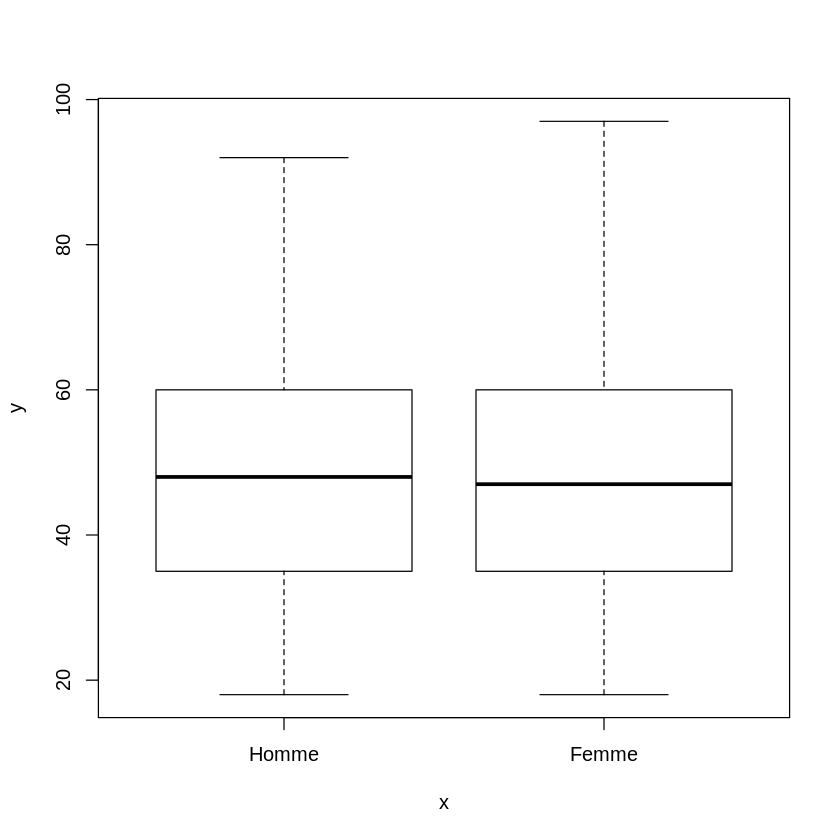

In [ ]:
plot(bd$sexe, bd$age) # var quali/quanti = boxplot - variable indépendante à gauche (x=cause), dépendante à droite (y=effet)

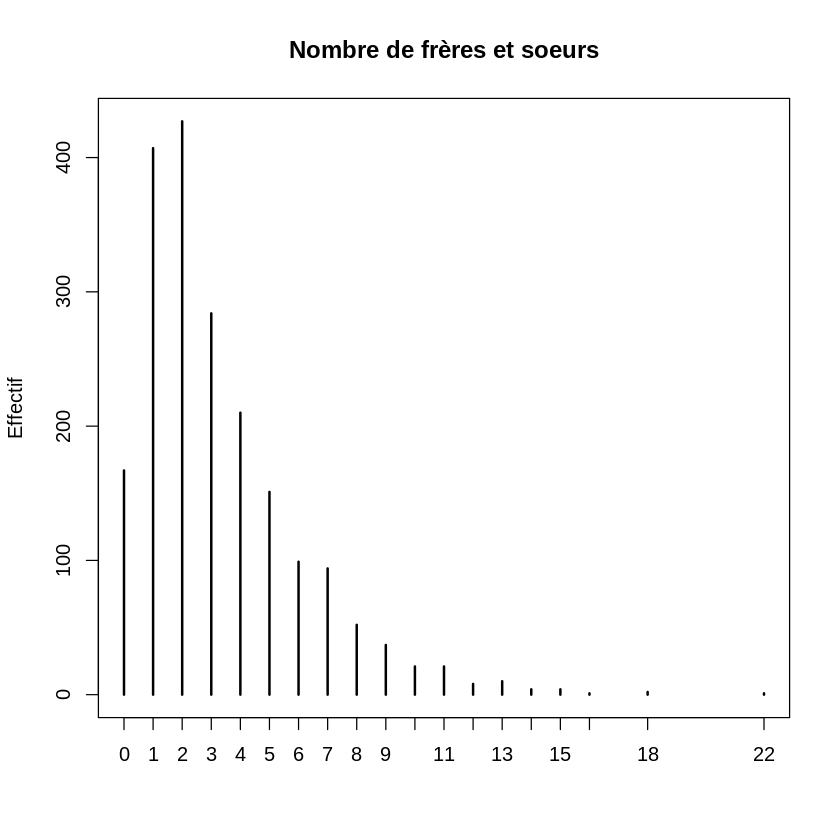

In [ ]:
plot(table(bd$freres.soeurs), main = "Nombre de frères et soeurs", ylab = "Effectif") # table d'effectifs

### Histogramme

In [ ]:
hist(bd$age) 

In [ ]:
# Grand nombre de paramétrages possibles

hist(bd$age, main = "Nombre d'heures d'écoute de la télé", col="violetred2", breaks = 10, xlab = "Nombres d'heures", ylab = "Effectif")
  # main=   titre du grahique
  # col=    couleur de l'histogramme
  # breaks= nombre de "bins"
  # xlab=   titre de l'axe x
  # ylab=   titre de l'axe y

### Boite à moustaches 

In [ ]:
boxplot(bd$heures.tv, main="Heures d'écoute de la télé", col="green", xlab = "légende horizontale", ylab = "Heures d'écoute" )

In [ ]:
## Avec l'utilisation du "tilde": la notation "formule" (y ~ x + b)

boxplot(bd$age ~ bd$hard.rock)
# ou
boxplot(age ~ sexe, bd) 

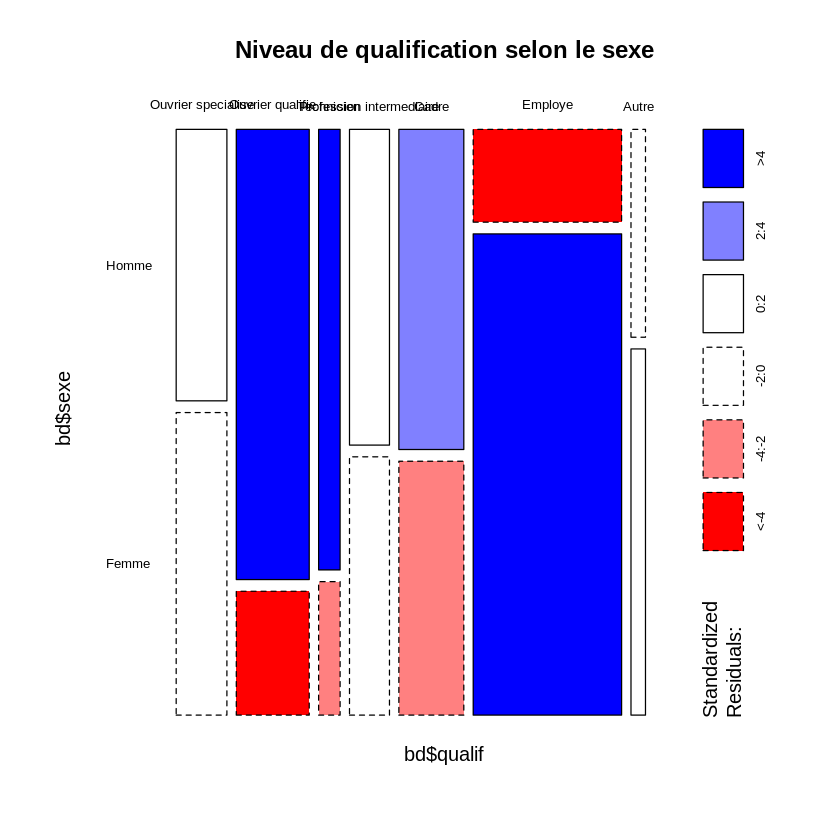

In [ ]:
### Graphique mosaique
mosaicplot(bd$qualif ~ bd$sexe, las = 1, shade = TRUE, main="Niveau de qualification selon le sexe")
# largeur: pourcentages en colonnes
# hauteur: pourcentages en lignes

## Package graphique ggplot2 (grammar of graphics)

* ggplot fonctionnne en additionnant des composantes (couches)
* ggplot() spécifie le tableau source des données
* geom: géométrie, ie choix du graphique (ex:geom_histogram)
* aes: aestetics, ie propriétés visuelles incluant l’axe des x (x), des y (y), la couleur des lignes ( colour ), ...
* Ensuite on peut personnaliser avec des titres, légendes, thèmes, facettes et tout un tas d'options


### geom_histogram = Histogramme


In [ ]:
ggplot(bd) + geom_histogram(aes(x = age))

In [ ]:
ggplot(bd) + geom_histogram(aes(x = age), fill="orchid1", binwidth = 1.5) 

### Le "faceting"

In [ ]:
# Le faceting permet d’effectuer plusieurs fois le même graphique selon les valeurs d’une ou plusieurs variables qualitatives, ICI (~sexe).
ggplot(bd) +  geom_histogram(aes(x = age)) +  facet_grid(~sexe)

### geom_bar - Graphique à barres

In [ ]:
ggplot(bd) + geom_bar(aes(x = age), fill = "darkblue", width = .5)

In [ ]:
ggplot(bd) + geom_bar(aes(x = trav.satisf), fill = "thistle3", width = .8) + xlab("Satisfaction") +
  ylab("Effectifs") + ggtitle("Satisfaction au travail")

In [ ]:
# Graphique à barres divisé par sexe
ggplot(bd) + geom_bar(aes(x = trav.satisf, fill = sexe), width = .8)+ xlab("Satisfaction") +
  ylab("Effectifs") + ggtitle("Satisfaction au travail")+ facet_wrap(~sexe)

### Le "mapping"

In [ ]:
# si on veut faire varier la couleur en fonction des valeurs prises par une variable, on réalise un mappage, et on doit donc placer l’attribut color à l’intérieur de aes()

ggplot(bd) + geom_bar(aes(x = occup, fill = sexe))                     # position = "stack" par défaut des effectifs
ggplot(bd) + geom_bar(aes(x = occup, fill = sexe), position = "dodge") # position = "dodge" pour effectifs côte à côte
ggplot(bd) + geom_bar(aes(x = occup, fill = sexe), position = "fill")  # position = "fill" pour représenter les proportions

### geom_point: Nuage de points

In [ ]:
ggplot(bd) + geom_point(aes(x = age, y = freres.soeurs, color=sexe), size=2, alpha=0.5)

In [ ]:
ggplot(bd) + geom_point(aes(x = age, y = freres.soeurs, color = sexe)) + scale_color_brewer("sexe", palette = "Accent") 

# Color à l'intérieur de aes() permet de faire varier la couleur des points en fonction des valeurs d’une troisième variable 
# Peut aussi faire varier grosseur avec size() et transparence avec alpha()
### Autre répertoire de couleurs scale_color_brewer: RColorBrewer::display.brewer.all()

In [ ]:
### ajouter une droite de régression
ggplot(bd, aes(x=age, y=freres.soeurs))+
  geom_point(col="steelblue2")+
  geom_smooth(method="lm", col="thistle3")+
  scale_x_log10()

### geom_boxplot - boite à moustache

In [ ]:
### On passe en y la variable quanti et en x la variable quali
ggplot(bd) + geom_boxplot(aes(x = sexe, y =freres.soeurs), varwidth = TRUE, fill = "midnightblue", color = "chartreuse1" ) 


### on fait varier la couleur selon une variable et on "flip" le tout
ggplot(bd, aes(x = sexe, y = freres.soeurs, color = sexe)) + geom_boxplot() + coord_flip()

In [ ]:
### Graphique de densité
# test Comparer des distributions avec leur densité
ggplot(bd, aes(x = age, color = sexe, fill=sexe)) + geom_density(alpha=0.55)